# Debugging Concussions

In [1]:
from QuantitativeCleaner import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_full = pd.read_parquet("F:/Data/Processing_data/OpponentPlays.parquet")

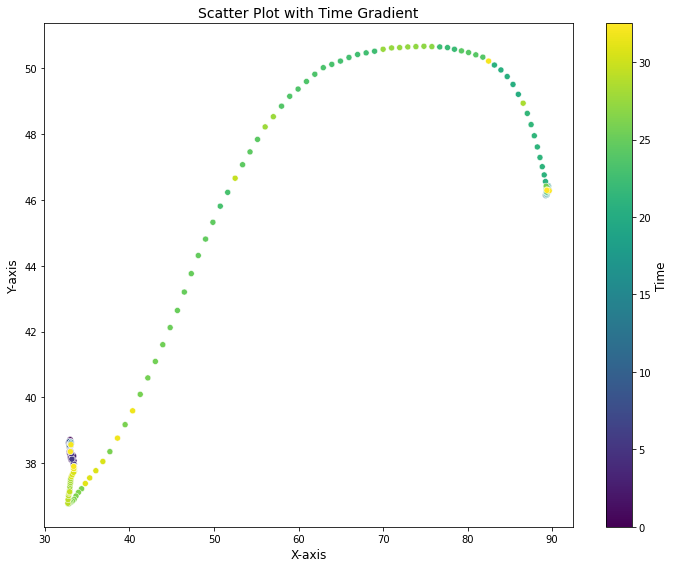

In [3]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


df = df_full[df_full['PlayKey'] == "31023-29-538"]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='x', y='y', hue='time', palette='viridis', ax=ax)

# Remove the legend created by seaborn
scatter.legend_.remove()

# Add a color bar
norm = plt.Normalize(df['time'].min(), df['time'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Time', fontsize=12)

# Set labels and title
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



## Start debugging
The tables start as csv files that are already chunked by part of season and year. 

In [4]:
import pandas as pd
df_orig = pd.read_csv("F:/Data/NFL-Punt-Analytics-Competition/NGS-2017-post.csv")
df = df_orig.copy()


In [5]:
df['PlayKey'] = (
    df['GSISID'].astype(str) + '-' + 
    df['GameKey'].astype(str) + '-' + 
    df['PlayID'].astype(str)
)

df.head()

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey
0,2017,665,1094,31940,2018-02-05 00:15:33.700,86.949997,31.740000,0.18,48.070000,204.600006,NaN,31940-665-1094
1,2017,665,1094,28237,2018-02-05 00:15:33.900,79.760002,41.180000,0.16,5.320000,113.519997,NaN,28237-665-1094
2,2017,665,1094,26293,2018-02-05 00:15:34.000,86.099998,28.520000,0.04,358.850006,117.839996,NaN,26293-665-1094
3,2017,665,1094,29239,2018-02-05 00:15:34.000,87.760002,28.700001,0.01,322.109985,293.480011,NaN,29239-665-1094
4,2017,665,1094,30288,2018-02-05 00:15:34.000,88.470001,33.520000,0.05,22.889999,126.959999,NaN,30288-665-1094


In [6]:
# Filter the DataFrame
df.sort_values(['PlayKey', 'Time'], inplace=True)

In [7]:
df.head(30)

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey
690134,2017,660,1488,19596,2018-01-14 02:23:26.800,74.300003,-0.96,0.10,292.500000,35.150002,NaN,19596-660-1488
690138,2017,660,1488,19596,2018-01-14 02:23:26.900,74.360001,-0.87,0.10,292.980011,35.730000,NaN,19596-660-1488
690142,2017,660,1488,19596,2018-01-14 02:23:27.000,74.400002,-0.79,0.10,293.649994,36.270000,NaN,19596-660-1488
690146,2017,660,1488,19596,2018-01-14 02:23:27.100,74.449997,-0.70,0.10,294.559998,37.410000,NaN,19596-660-1488
690150,2017,660,1488,19596,2018-01-14 02:23:27.200,74.500000,-0.62,0.10,296.230011,38.759998,NaN,19596-660-1488
690154,2017,660,1488,19596,2018-01-14 02:23:27.300,74.570000,-0.54,0.10,298.250000,40.160000,NaN,19596-660-1488
698446,2017,660,1488,19596,2018-01-14 02:23:27.400,74.629997,-0.45,0.11,300.290008,40.570000,NaN,19596-660-1488
698733,2017,660,1488,19596,2018-01-14 02:23:27.500,74.699997,-0.38,0.10,302.369995,42.389999,NaN,19596-660-1488
699136,2017,660,1488,19596,2018-01-14 02:23:27.600,74.769997,-0.31,0.10,304.450012,43.380001,NaN,19596-660-1488
699261,2017,660,1488,19596,2018-01-14 02:23:27.700,74.820000,-0.23,0.09,306.570007,45.270000,NaN,19596-660-1488


In [8]:
# Filter the DataFrame
df = df[(df['PlayKey'] == "19596-660-1488")]

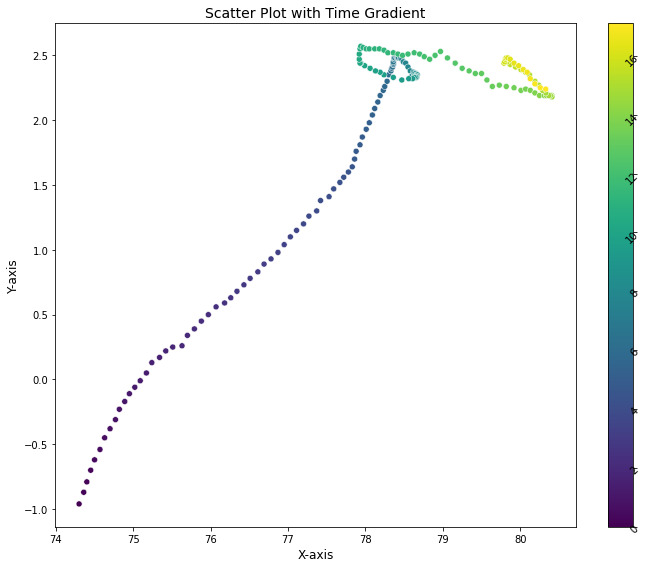

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df is your pandas DataFrame

# Convert 'Time' to datetime if it's not already
df['Time'] = pd.to_datetime(df['Time'])

# Create a numeric representation of time (seconds since the earliest time)
df['Time_numeric'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='x', y='y', hue='Time_numeric', palette='viridis', ax=ax)

# Remove the legend if it exists
if hasattr(scatter, 'legend_') and scatter.legend_ is not None:
    scatter.legend_.remove()

# Add a color bar
norm = plt.Normalize(df['Time_numeric'].min(), df['Time_numeric'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

# # Format the colorbar ticks to show actual dates
# cbar.set_label('Time', fontsize=12)
# cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: (df['Time'].min() + pd.Timedelta(seconds=x)).strftime('%Y-%m-%d %H:%M:%S')))

# Set labels and title
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

# Rotate colorbar tick labels for better readability
plt.setp(cbar.ax.get_yticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


So the steps we are taking to get this plot, which is showing the timing appropriately are as follows: 

In [32]:
import pandas as pd
df_orig = pd.read_csv("F:/Data/NFL-Punt-Analytics-Competition/NGS-2017-post.csv")
df = df_orig.copy()

In [33]:
df['PlayKey'] = (
    df['GSISID'].astype(str) + '-' + 
    df['GameKey'].astype(str) + '-' + 
    df['PlayID'].astype(str)
)

# Filter the DataFrame
df.sort_values(['PlayKey', 'Time'], inplace=True)
# Convert 'Time' to datetime if it's not already
df['Time'] = pd.to_datetime(df['Time'])

# Create a numeric representation of time (seconds since the earliest time)
df['Time_numeric'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

df.head()



,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey,Time_numeric
690134,2017,660,1488,19596,2018-01-14 02:23:26.800,74.300003,-0.96,0.1,292.500000,35.150002,NaN,19596-660-1488,621768.6
690138,2017,660,1488,19596,2018-01-14 02:23:26.900,74.360001,-0.87,0.1,292.980011,35.730000,NaN,19596-660-1488,621768.7
690142,2017,660,1488,19596,2018-01-14 02:23:27.000,74.400002,-0.79,0.1,293.649994,36.270000,NaN,19596-660-1488,621768.8
690146,2017,660,1488,19596,2018-01-14 02:23:27.100,74.449997,-0.70,0.1,294.559998,37.410000,NaN,19596-660-1488,621768.9
690150,2017,660,1488,19596,2018-01-14 02:23:27.200,74.500000,-0.62,0.1,296.230011,38.759998,NaN,19596-660-1488,621769.0


In [14]:
df.PlayKey.unique()

array(['19596-660-1488', '19596-660-2687', '19596-660-3170', ...,
       '33968-664-1206', '33968-664-3168', '33968-664-368'], dtype=object)

In [15]:
df = df[(df['PlayKey'] == "33968-664-3168")]

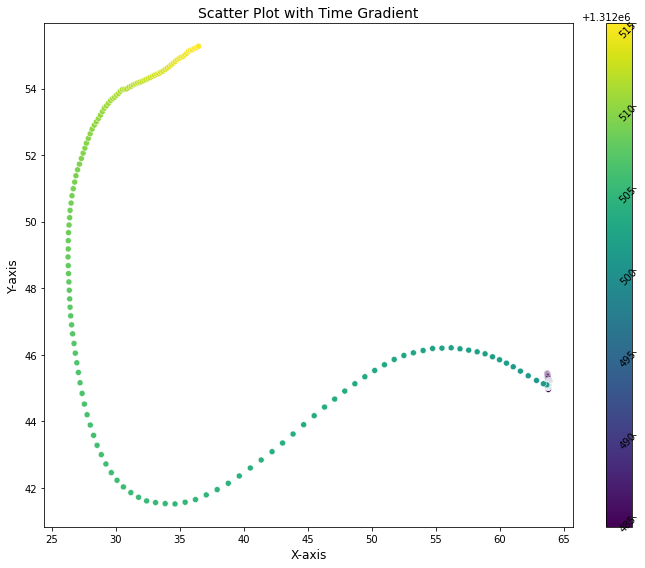

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='x', y='y', hue='Time_numeric', palette='viridis', ax=ax)

# Remove the legend if it exists
if hasattr(scatter, 'legend_') and scatter.legend_ is not None:
    scatter.legend_.remove()

# Add a color bar
norm = plt.Normalize(df['Time_numeric'].min(), df['Time_numeric'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

# # Format the colorbar ticks to show actual dates
# cbar.set_label('Time', fontsize=12)
# cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: (df['Time'].min() + pd.Timedelta(seconds=x)).strftime('%Y-%m-%d %H:%M:%S')))

# Set labels and title
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

# Rotate colorbar tick labels for better readability
plt.setp(cbar.ax.get_yticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

This provides us with the correct timing and parameters up to including the PlayKey. 
Following this, I still need to process the physics data, join with the video review, and then merge all of the individual ngs files together. 

I need to write these previous steps in Polars so I can optimize performance with the larger tables. 

In [ ]:
def column_corrector(df):
    import polars as pl # type: ignore
    """
    Add a Play_Time column that acts like the 'time' column did in the injury dataset. 
    Each PlayKey will start at 0.0 and increase by 0.1 for each subsequent record.
    """
    df = df.with_columns([
        pl.concat_str([
            pl.col('GSISID').cast(pl.Int32).cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('GameKey').cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('PlayID').cast(pl.Utf8)
        ]).alias('PlayKey')
    ])
     
    
    df = df.sort(['PlayKey', 'Time'])

    df = df.with_columns(
        pl.col('Time').cast(pl.Datetime)
    )

    df = df.with_columns(
        (pl.col('Time') - pl.col('Time').min()).dt.total_seconds().alias('Time_numeric')
        )


    
    return df

In [38]:
import polars as pl
df_orig = pl.read_csv("F:/Data/NFL-Punt-Analytics-Competition/NGS-2017-post.csv")
df = df_orig

In [58]:
df = df_orig
df = df.with_columns([
    pl.concat_str([
        pl.col('GSISID').cast(pl.Int32).cast(pl.Utf8),
        pl.lit('-'),
        pl.col('GameKey').cast(pl.Utf8),
        pl.lit('-'),
        pl.col('PlayID').cast(pl.Utf8)
    ]).alias('PlayKey')
])

df = df.sort(['PlayKey', 'Time'])

df = df.with_columns([
    pl.col('Time').str.strptime(
        pl.Datetime,
        format="%Y-%m-%d %H:%M:%S.%3f"
    ).alias('Time')
])



In [59]:
df.sort(['PlayKey', 'Time']).head(10)

Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey
i64,i64,i64,i64,datetime[ms],f64,f64,f64,f64,f64,str,str
2017,660,1488,19596,2018-01-14 02:23:26.800,74.300003,-0.96,0.1,292.5,35.150002,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:26.900,74.360001,-0.87,0.1,292.980011,35.73,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:27,74.400002,-0.79,0.1,293.649994,36.27,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:27.100,74.449997,-0.7,0.1,294.559998,37.41,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:27.200,74.5,-0.62,0.1,296.230011,38.759998,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:27.300,74.57,-0.54,0.1,298.25,40.16,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:27.400,74.629997,-0.45,0.11,300.290008,40.57,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:27.500,74.699997,-0.38,0.1,302.369995,42.389999,null,"""19596-660-1488"""
2017,660,1488,19596,2018-01-14 02:23:27.600,74.769997,-0.31,0.1,304.450012,43.380001,null,"""19596-660-1488"""


In [62]:
def create_time_numeric(df):
    # Sort the dataframe by PlayKey and Time
    df = df.sort(['PlayKey', 'Time'])
    
    # Create a new column with incrementing values for each PlayKey
    df = df.with_columns([
        pl.arange(0, pl.len()).over('PlayKey').alias('index')
    ])
    
    # Calculate Time_numeric
    df = df.with_columns([
        (pl.col('index') * 0.1).alias('Time_numeric')
    ])
    
    # Drop the temporary index column
    df = df.drop('index')
    
    return df

In [63]:
df = create_time_numeric(df)
df.head()

Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey,Time_numeric
i64,i64,i64,i64,datetime[ms],f64,f64,f64,f64,f64,str,str,f64
2017,660,1488,19596,2018-01-14 02:23:26.800,74.300003,-0.96,0.1,292.5,35.150002,null,"""19596-660-1488""",0.0
2017,660,1488,19596,2018-01-14 02:23:26.900,74.360001,-0.87,0.1,292.980011,35.73,null,"""19596-660-1488""",0.1
2017,660,1488,19596,2018-01-14 02:23:27,74.400002,-0.79,0.1,293.649994,36.27,null,"""19596-660-1488""",0.2
2017,660,1488,19596,2018-01-14 02:23:27.100,74.449997,-0.7,0.1,294.559998,37.41,null,"""19596-660-1488""",0.3
2017,660,1488,19596,2018-01-14 02:23:27.200,74.5,-0.62,0.1,296.230011,38.759998,null,"""19596-660-1488""",0.4


In [64]:
len(df)

1037158

In [66]:
df.write_csv("F:/Data/Clean_Data/ngs_test.csv")

In [67]:
del df

In [68]:
df = pd.read_csv("F:/Data/Clean_Data/ngs_test.csv")


In [70]:
df = df[(df['PlayKey'] == "19596-660-1488")]

In [8]:
def scatter_this(df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates


    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create the scatter plot
    scatter = sns.scatterplot(data=df, x='x', y='y', hue='time', palette='viridis', ax=ax)

    # Remove the legend if it exists
    if hasattr(scatter, 'legend_') and scatter.legend_ is not None:
        scatter.legend_.remove()

    # Add a color bar
    norm = plt.Normalize(df['time'].min(), df['time'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)

    # # Format the colorbar ticks to show actual dates
    # cbar.set_label('Time', fontsize=12)
    # cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: (df['Time'].min() + pd.Timedelta(seconds=x)).strftime('%Y-%m-%d %H:%M:%S')))

    # Set labels and title
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

    # Rotate colorbar tick labels for better readability
    plt.setp(cbar.ax.get_yticklabels(), rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()


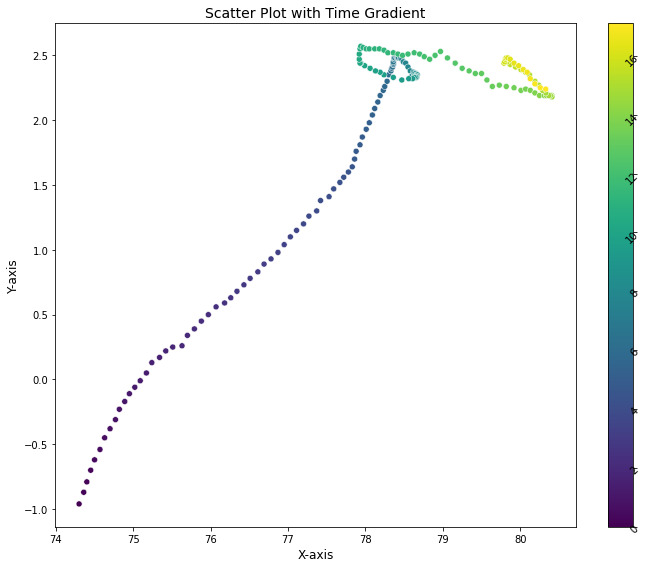

In [73]:
scatter_this(df)

In [170]:
import polars as pl
import pandas as pd
from QuantitativeCleaner import *


df_orig = pl.read_csv("F:/Data/NFL-Punt-Analytics-Competition/NGS-2017-pre.csv", truncate_ragged_lines=True, ignore_errors=True)
df = df_orig

In [171]:
df = df_orig

In [172]:
# def column_corrector(df):
#     import polars as pl # type: ignore
#     """
#     Add a Play_Time column that acts like the 'time' column did in the injury dataset. 
#     Each PlayKey will start at 0.0 and increase by 0.1 for each subsequent record.
#     """
#     df = df.with_columns([
#         pl.concat_str([
#             pl.col('GSISID').cast(pl.Int32).cast(pl.Utf8)
#             , pl.lit('-')
#             , pl.col('GameKey').cast(pl.Utf8)
#             , pl.lit('-')
#             , pl.col('PlayID').cast(pl.Utf8)
#         ]).alias('PlayKey')
#     ])
     
#     df = df.sort(['PlayKey', 'Time'])

#     df = df.with_columns([
#         pl.col('Time').str.strptime(
#             pl.Datetime
#             , format="%Y-%m-%d %H:%M:%S.%3f"
#             , strict=False
#         ).alias('Time')
#     ])
    
#     df = create_time_numeric(df)

#     df = df.select([
#         'PlayKey'
#         , 'Time_numeric'
#         , 'x'
#         , 'y'
#         , 'o'
#         , 'dir'
#         , 'GSISID'
#         ]).rename({"Time_numeric":"time"})
    
#     return df

In [173]:
df_polar = column_corrector(df)

In [174]:
df_polar.head()

PlayKey,time,x,y,o,dir,GSISID
str,f64,f64,f64,f64,f64,i64
"""16919-354-2377""",0.0,49.98,53.830002,100.82,168.369995,16919
"""16919-354-2377""",0.1,50.02,53.720001,104.5,165.710007,16919
"""16919-354-2377""",0.2,50.060001,53.619999,110.809998,164.059998,16919
"""16919-354-2377""",0.3,50.060001,53.560001,117.300003,165.270004,16919
"""16919-354-2377""",0.4,50.07,53.490002,124.239998,167.089996,16919


In [90]:
# df_pandas = df_polar.to_pandas()

In [91]:
# df_pandas = df_pandas[df_pandas.PlayKey == '19596-660-1488']

In [92]:
# scatter_this(df_pandas)

So we have the function column_corrector() adjusted to collect the times correctly. Now to run the full transformation with the physics. 

In [175]:
# df_polar.head()

In [176]:
# def clean_review():
#     import polars as pl
#     from DataHandler import data_shrinker

#     review = pl.read_csv("F:/Data/NFL-Punt-Analytics-Competition/video_review.csv")
#     review, schema = data_shrinker(review)
    
#     review = review.with_columns([
#         pl.concat_str([
#             pl.col('GSISID').cast(pl.Int32).cast(pl.Utf8)
#             , pl.lit('-')
#             , pl.col('GameKey').cast(pl.Utf8)
#             , pl.lit('-')
#             , pl.col('PlayID').cast(pl.Utf8)
#         ]).alias('PlayKey')
#         , pl.concat_str([
#             pl.col('Primary_Partner_GSISID').cast(pl.Utf8)
#             , pl.lit('-')
#             , pl.col('GameKey').cast(pl.Utf8)
#             , pl.lit('-')
#             , pl.col('PlayID').cast(pl.Utf8)
#         ]).alias('OpponentKey')
#     ])

#     review = review.with_columns([
#         pl.col('PlayKey').alias('InjuryKey')
#         ]).drop([
#         'Season_Year'
#         , 'GameKey'
#         , 'PlayID'
#         , 'GSISID'
#         , 'Turnover_Related'
#         , 'Friendly_Fire'
#         ])
    
#     return review


In [177]:
review = clean_review()

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 36.9%


In [178]:
review.head()

Player_Activity_Derived,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,PlayKey,OpponentKey,InjuryKey
cat,cat,str,cat,str,str,str
"""Tackling""","""Helmet-to-body""","""32482""","""Tackled""","""31057-5-3129""","""32482-5-3129""","""31057-5-3129"""
"""Blocked""","""Helmet-to-helmet""","""31059""","""Blocking""","""29343-21-2587""","""31059-21-2587""","""29343-21-2587"""
"""Tackling""","""Helmet-to-body""","""31941""","""Tackled""","""31023-29-538""","""31941-29-538""","""31023-29-538"""
"""Tackling""","""Helmet-to-body""","""28249""","""Tackled""","""33121-45-1212""","""28249-45-1212""","""33121-45-1212"""
"""Blocked""","""Helmet-to-body""","""31756""","""Blocked""","""32444-54-1045""","""31756-54-1045""","""32444-54-1045"""


In [190]:
import polars as pl
pl.enable_string_cache()

# Establish the column header order 
column_order = [
    'PlayKey'
    , 'time'
    , 'x'
    , 'y'
    , 'o'
    , 'dir'
    , 'GSISID'
    , 'PlayerActivity'
    , 'ImpactType'
    , 'OpponentKey'
    , 'InjuryKey'
]

# First join: review.InjuryKey = df_polar.PlayKey
df_joined_injury = df_polar.join(
    review
    , on='PlayKey'
    , how='inner'
    ).drop(['Primary_Partner_GSISID'
            , 'Primary_Partner_Activity_Derived'
            ]
    ).rename({'Player_Activity_Derived': 'PlayerActivity', 'Primary_Impact_Type': 'ImpactType'}
    ).select(column_order)


# Second join: review.OpponentKey = df_polar.PlayKey
df_joined_opponent = df_polar.join(
    review
    , left_on='PlayKey'
    , right_on='OpponentKey'
    , how='inner'
    ).drop(['PlayKey_right'
        , 'Player_Activity_Derived'
        , 'Primary_Partner_GSISID']
    ).rename({'Primary_Partner_Activity_Derived': 'PlayerActivity', 'Primary_Impact_Type': 'ImpactType'})

df_joined_opponent = df_joined_opponent.with_columns([
    pl.lit(None).cast(pl.Utf8).alias('OpponentKey')
    ]).select(column_order)


# Combine the results
df_final = pl.concat([df_joined_injury, df_joined_opponent])

# # Add the InjuryKey_joined column
# df_final = df_final.with_columns([
#     pl.col('InjuryKey').alias('InjuryKey_joined')
# ])


In [191]:
df_final.head()

PlayKey,time,x,y,o,dir,GSISID,PlayerActivity,ImpactType,OpponentKey,InjuryKey
str,f64,f64,f64,f64,f64,i64,cat,cat,str,str
"""30171-357-3630""",0.0,36.5,14.92,233.770004,323.920013,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.1,36.299999,15.16,235.490005,323.390015,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.2,36.099998,15.37,237.080002,322.820007,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.3,35.919998,15.57,238.160004,322.799988,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.4,35.73,15.77,238.660004,323.26001,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""


In [183]:
def scatter_this(df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    df = df.to_pandas()

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create the scatter plot
    scatter = sns.scatterplot(data=df, x='x', y='y', hue='time', palette='viridis', ax=ax)

    # Remove the legend if it exists
    if hasattr(scatter, 'legend_') and scatter.legend_ is not None:
        scatter.legend_.remove()

    # Add a color bar
    norm = plt.Normalize(df['time'].min(), df['time'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)

    # # Format the colorbar ticks to show actual dates
    # cbar.set_label('Time', fontsize=12)
    # cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: (df['Time'].min() + pd.Timedelta(seconds=x)).strftime('%Y-%m-%d %H:%M:%S')))

    # Set labels and title
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

    # Rotate colorbar tick labels for better readability
    plt.setp(cbar.ax.get_yticklabels(), rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [184]:
df_filtered = df_final.filter(pl.col("InjuryKey") == '30171-357-3630')

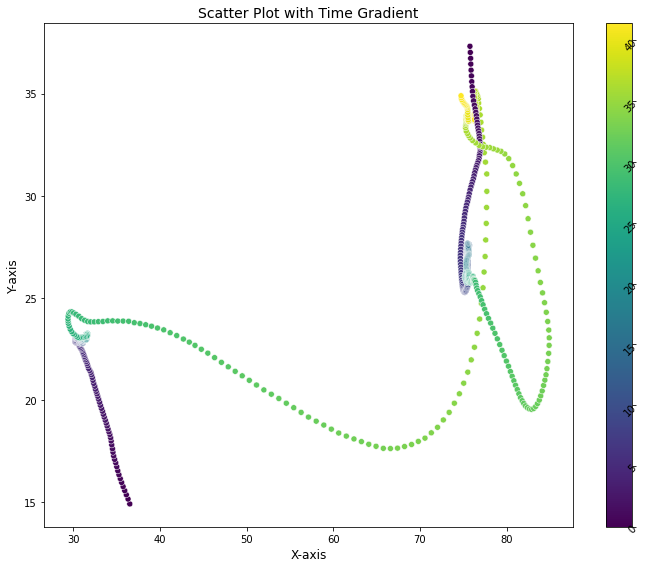

In [185]:
scatter_this(df_filtered)

## Cool, cool, cool, cool, cool. 

The paths are still working with the correct time interals and order. I have reduced the size of the table by restricting it to the injured players and their opponents during each play. I have demonstrated that I can show the individual paths as well as the player-opponent paired paths using the InjuryKey. 

The next step is to add the physics transformations to the smaller df. I added a polars to pandas transformation to the scatter_this() formula that plots it, so no need to convert to pandas prior to plotting - the input df is polars. 

In [192]:
df_final.head()

PlayKey,time,x,y,o,dir,GSISID,PlayerActivity,ImpactType,OpponentKey,InjuryKey
str,f64,f64,f64,f64,f64,i64,cat,cat,str,str
"""30171-357-3630""",0.0,36.5,14.92,233.770004,323.920013,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.1,36.299999,15.16,235.490005,323.390015,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.2,36.099998,15.37,237.080002,322.820007,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.3,35.919998,15.57,238.160004,322.799988,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.4,35.73,15.77,238.660004,323.26001,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""


In [193]:
def reduce_float_precision(df):
    for col in df.columns:
        if df[col].dtype == pl.Float64:
            df = df.with_columns(pl.col(col).cast(pl.Float32))
        elif df[col].dtype == pl.Int64:
            df = df.with_columns(pl.col(col).cast(pl.Int32))
    return df

In [194]:
df_final = reduce_float_precision(df_final)
df_final.head()

PlayKey,time,x,y,o,dir,GSISID,PlayerActivity,ImpactType,OpponentKey,InjuryKey
str,f32,f32,f32,f32,f32,i32,cat,cat,str,str
"""30171-357-3630""",0.0,36.5,14.92,233.770004,323.920013,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.1,36.299999,15.16,235.490005,323.390015,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.2,36.099998,15.37,237.080002,322.820007,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.3,35.919998,15.57,238.160004,322.799988,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.4,35.73,15.77,238.660004,323.26001,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""


In [195]:
group_df = df_final.clone()

In [196]:
group_df.head()

PlayKey,time,x,y,o,dir,GSISID,PlayerActivity,ImpactType,OpponentKey,InjuryKey
str,f32,f32,f32,f32,f32,i32,cat,cat,str,str
"""30171-357-3630""",0.0,36.5,14.92,233.770004,323.920013,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.1,36.299999,15.16,235.490005,323.390015,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.2,36.099998,15.37,237.080002,322.820007,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.3,35.919998,15.57,238.160004,322.799988,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""
"""30171-357-3630""",0.4,35.73,15.77,238.660004,323.26001,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630"""


In [198]:
from QualitativeCleaner import *
group_df = df_final.clone()
group_df = (group_df
            .pipe(angle_corrector)
            .pipe(velocity_calculator)
            .pipe(body_builder_conc)
            .pipe(impulse_calculator)
            )
group_df.head()


PlayKey,time,x,y,o,dir,GSISID,PlayerActivity,ImpactType,OpponentKey,InjuryKey,Angle_Diff,Displacement,Speed,vx,vy,omega_dir,omega_o,omega_diff,Position,Height_m,Weight_kg,Chest_rad_m,px,py,moment,moment_upper,p_magnitude,L_dir,L_diff,Jx,Jy,J_magnitude,torque,torque_internal
str,f32,f32,f32,f32,f32,i32,cat,cat,str,str,f32,f32,f32,f32,f32,f32,f32,f32,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
"""30171-357-3630""",0.0,36.5,14.92,143.77002,-126.079987,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630""",90.150002,null,null,null,null,null,null,null,"""TE""",1.96,114.599998,0.191,null,null,0.348394,0.243876,null,null,null,null,null,null,null,null
"""30171-357-3630""",0.0,36.5,14.92,143.77002,-126.079987,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630""",90.150002,null,null,null,null,null,null,null,"""TE""",1.96,114.599998,0.191,null,null,0.348394,0.243876,null,null,null,null,null,null,null,null
"""30171-357-3630""",0.1,36.299999,15.16,145.48999,-126.609985,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630""",87.900002,0.31241,3.124103,-2.000008,2.399998,-0.092504,0.300193,0.392697,"""TE""",1.96,114.599998,0.191,-229.200867,275.039734,0.348394,0.243876,358.022186,-0.032228,0.095769,null,null,null,null,null
"""30171-357-3630""",0.1,36.299999,15.16,145.48999,-126.609985,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630""",87.900002,0.31241,3.124103,-2.000008,2.399998,-0.092504,0.300193,0.392697,"""TE""",1.96,114.599998,0.191,-229.200867,275.039734,0.348394,0.243876,358.022186,-0.032228,0.095769,0.0,0.0,0.0,0.0,0.0
"""30171-357-3630""",0.2,36.099998,15.37,147.080017,-127.179993,30171,"""Tackling""","""Helmet-to-body""","""29384-357-3630""","""30171-357-3630""",85.739998,0.290001,2.900006,-2.000008,2.1,-0.099483,0.277512,0.376995,"""TE""",1.96,114.599998,0.191,-229.200867,240.660034,0.348394,0.243876,332.340637,-0.034659,0.09194,0.0,-34.3797,34.3797,-0.024313,-0.038294


In [224]:
filtered_df = group_df.filter(pl.col("PlayKey") == "30171-357-3630")

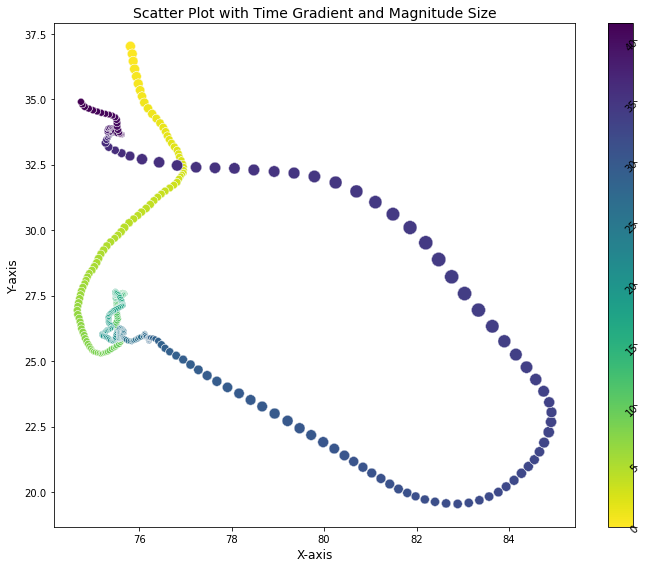

In [222]:
scatter_this(filtered_df)

In [11]:
# def scatter_this(df, parameter='p_magnitude'):
#     import pandas as pd
#     import seaborn as sns
#     import matplotlib.pyplot as plt
#     import matplotlib.dates as mdates

#     df = df.to_pandas()

#     # Create the figure and axes
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Create the scatter plot with size based on p_magnitude
#     scatter = sns.scatterplot(
#         data=df
#         , x='x'
#         , y='y' 
#         , hue='time' 
#         , alpha = 0.8
#         , size=parameter  # Set size based on p_magnitude
#         , sizes=(20, 200)     # Adjust the range of point sizes
#         , palette='viridis_r' # Use reversed viridis colormap
#         , ax=ax
#     )

#     # Remove the legend if it exists
#     if hasattr(scatter, 'legend_') and scatter.legend_ is not None:
#         scatter.legend_.remove()

#     # Add a color bar
#     norm = plt.Normalize(df['time'].min(), df['time'].max())
#     sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
#     sm.set_array([])
#     cbar = plt.colorbar(sm, ax=ax)

#     # Set labels and title
#     ax.set_xlabel('X-axis', fontsize=12)
#     ax.set_ylabel('Y-axis', fontsize=12)
#     ax.set_title('Scatter Plot with Time Gradient and Magnitude Size', fontsize=14)

#     # Set static frame from 0 to 120 on x-axis and 0 to 60 on y-axis
#     ax.set_xlim(0, 120)
#     ax.set_ylim(0, 60)

#     # Rotate colorbar tick labels for better readability
#     plt.setp(cbar.ax.get_yticklabels(), rotation=45, ha='right')

#     # Show the plot
#     plt.tight_layout()
#     plt.show()


In [232]:
filtered_df = group_df.filter(pl.col("InjuryKey") == "30171-357-3630")

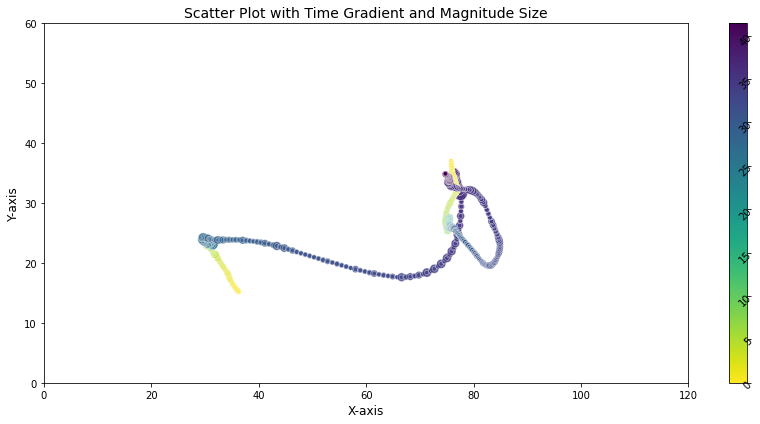

In [235]:
scatter_this(filtered_df, 'J_magnitude')

# New functions for the Concussion Tracking Transformation

In [1]:
def column_corrector(df):
    import polars as pl # type: ignore
    """
    Add a Play_Time column that acts like the 'time' column did in the injury dataset. 
    Each PlayKey will start at 0.0 and increase by 0.1 for each subsequent record.
    """
    df = df.with_columns([
        pl.concat_str([
            pl.col('GSISID').cast(pl.Int32).cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('GameKey').cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('PlayID').cast(pl.Utf8)
        ]).alias('PlayKey')
    ])
     
    df = df.sort(['PlayKey', 'Time'])

    df = df.with_columns([
        pl.col('Time').str.strptime(
            pl.Datetime
            , format="%Y-%m-%d %H:%M:%S.%3f"
            , strict=False
        ).alias('Time')
    ])
    
    df = create_time_numeric(df)

    df = df.select([
        'PlayKey'
        , 'Time_numeric'
        , 'x'
        , 'y'
        , 'o'
        , 'dir'
        , 'GSISID'
        ]).rename({"Time_numeric":"time"})
    
    return df

In [2]:
def clean_review():
    import polars as pl
    pl.enable_string_cache()
    from DataHandler import data_shrinker

    review = pl.read_csv("F:/Data/NFL-Punt-Analytics-Competition/video_review.csv")
    review, schema = data_shrinker(review)
    
    review = review.with_columns([
        pl.concat_str([
            pl.col('GSISID').cast(pl.Int32).cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('GameKey').cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('PlayID').cast(pl.Utf8)
        ]).alias('PlayKey')
        , pl.concat_str([
            pl.col('Primary_Partner_GSISID').cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('GameKey').cast(pl.Utf8)
            , pl.lit('-')
            , pl.col('PlayID').cast(pl.Utf8)
        ]).alias('OpponentKey')
    ])

    review = review.with_columns([
        pl.col('PlayKey').alias('InjuryKey')
        ]).drop([
        'Season_Year'
        , 'GameKey'
        , 'PlayID'
        , 'GSISID'
        , 'Turnover_Related'
        , 'Friendly_Fire'
        ])
    
    return review

In [3]:
def create_opponent_plays(df, review): 
    import polars as pl #Type: ignore
    pl.enable_string_cache()

    # Establish the column header order 
    column_order = [
        'PlayKey'
        , 'time'
        , 'x'
        , 'y'
        , 'o'
        , 'dir'
        , 'GSISID'
        , 'PlayerActivity'
        , 'ImpactType'
        , 'OpponentKey'
        , 'InjuryKey'
    ]

    # First join: review.InjuryKey = df.PlayKey
    df_joined_injury = df.join(
        review
        , on='PlayKey'
        , how='inner'
        ).drop(['Primary_Partner_GSISID'
                , 'Primary_Partner_Activity_Derived'
                ]
        ).rename({'Player_Activity_Derived': 'PlayerActivity', 'Primary_Impact_Type': 'ImpactType'}
        ).select(column_order)


    # Second join: review.OpponentKey = df.PlayKey
    df_joined_opponent = df.join(
        review
        , left_on='PlayKey'
        , right_on='OpponentKey'
        , how='inner'
        ).drop(['PlayKey_right'
            , 'Player_Activity_Derived'
            , 'Primary_Partner_GSISID']
        ).rename({'Primary_Partner_Activity_Derived': 'PlayerActivity', 'Primary_Impact_Type': 'ImpactType'})

    df_joined_opponent = df_joined_opponent.with_columns([
        pl.lit(None).cast(pl.Utf8).alias('OpponentKey')
        ]).select(column_order)


    # Combine the results
    df_final = pl.concat([df_joined_injury, df_joined_opponent])

    return df_final

In [4]:
def reduce_float_precision(df):
    for col in df.columns:
        if df[col].dtype == pl.Float64:
            df = df.with_columns(pl.col(col).cast(pl.Float32))
        elif df[col].dtype == pl.Int64:
            df = df.with_columns(pl.col(col).cast(pl.Int32))
    return df

In [5]:
def scatter_this(df, parameter='p_magnitude'):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    df = df.to_pandas()

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the scatter plot with size based on p_magnitude
    scatter = sns.scatterplot(
        data=df
        , x='x'
        , y='y' 
        , hue='time' 
        , alpha = 0.8
        , size=parameter  # Set size based on p_magnitude
        , sizes=(20, 200)     # Adjust the range of point sizes
        , palette='viridis_r' # Use reversed viridis colormap
        , ax=ax
    )

    # Remove the legend if it exists
    if hasattr(scatter, 'legend_') and scatter.legend_ is not None:
        scatter.legend_.remove()

    # Add a color bar
    norm = plt.Normalize(df['time'].min(), df['time'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)

    # Set labels and title
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title('Scatter Plot with Time Gradient and Magnitude Size', fontsize=14)

    # Set static frame from 0 to 120 on x-axis and 0 to 60 on y-axis
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 60)

    # Rotate colorbar tick labels for better readability
    plt.setp(cbar.ax.get_yticklabels(), rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [6]:
def create_time_numeric(df):
    # Sort the dataframe by PlayKey and Time
    df = df.sort(['PlayKey', 'Time'])
    
    # Create a new column with incrementing values for each PlayKey
    df = df.with_columns([
        pl.arange(0, pl.len()).over('PlayKey').alias('index')
    ])
    
    # Calculate Time_numeric
    df = df.with_columns([
        (pl.col('index') * 0.1).alias('Time_numeric')
    ])
    
    # Drop the temporary index column
    df = df.drop('index')
    
    return df

In [7]:
def transform_concussion_tracking(file_path, review):
    from QuantitativeCleaner import angle_corrector, velocity_calculator, body_builder_conc, impulse_calculator
    import polars as pl #Type: ignore
    pl.enable_string_cache()

    # Read and filter for injured pairs
    df = pl.read_csv(file_path, truncate_ragged_lines=True, ignore_errors=True)
    df = column_corrector(df)
    df = create_opponent_plays(df, review)
    df = reduce_float_precision(df)

    # Mechanics Processing
    df = (df
          .pipe(angle_corrector)
          .pipe(velocity_calculator)
          .pipe(body_builder_conc)
          .pipe(impulse_calculator)
          )
    
    return df

In [8]:
import polars as pl
import os

def process_ngs_files(source_dir, output_dir):
    # List all NGS files in the directory
    ngs_files = [f for f in os.listdir(source_dir) if f.startswith('NGS-')]

    review = clean_review()
    # Process each file and store the results
    processed_dfs = []
    for file in ngs_files:
        file_path = os.path.join(source_dir, file)
        processed_df = transform_concussion_tracking(file_path, review)
        processed_dfs.append(processed_df)

    # Concatenate all processed DataFrames
    combined_df = pl.concat(processed_dfs)

    # Save the combined DataFrame to a CSV file
    output_path = os.path.join(output_dir, 'TrackingConcussions.parquet')
    combined_df.write_parquet(output_path)

    print(f"Combined processed data saved to: {output_path}")
    return combined_df



In [9]:
output_dir = 'F:/Data/Processing_data/'
source_dir = 'F:/Data/NFL-Punt-Analytics-Competition/'
df = process_ngs_files(source_dir, output_dir)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 36.9%
Combined processed data saved to: F:/Data/Processing_data/TrackingConcussions.parquet


In [10]:

def track_all_quant(trackinginjuries_path, opponentplays_path):
    """ 
    Concatenates the two tracking dataframes for Viz creation with all injuries. 
    This additionally adds an InjuryType column for concussions and other. 
    """
    from DataHandler import data_loader
    import polars as pl #type: ignore
    pl.enable_string_cache()

    #Write 
    output_path = "F:/Data/Processing_data/All_Tracking.parquet"

    body_part = data_loader('injuries').select(['PlayKey', 'BodyPart']).filter(pl.col("PlayKey").is_not_null())
    concussions = pl.read_parquet(opponentplays_path)
    injuries = pl.read_parquet(trackinginjuries_path)


    concussions = concussions.with_columns(
        pl.when(pl.col("OpponentKey").is_not_null())
            .then(pl.lit("Concussion"))
            .otherwise(pl.lit("No Injury"))
            .alias("InjuryType")
            )

    injuries = injuries.join(
        body_part
        , on='PlayKey'
        , how='left' 
        ).rename({"BodyPart": "InjuryType"}
        ).with_columns(
            pl.col("PlayKey").alias('InjuryKey')
        )
    

    common_columns = ["PlayKey"
                    , "time"
                    , "x"
                    , "y"
                    , "dir"
                    , "o"
                    , "Angle_Diff"
                    , "Displacement"
                    , "Speed"
                    , "vx"
                    , "vy"
                    , "omega_dir"
                    , "omega_o"
                    , "omega_diff"
                    , "Position"
                    , "Height_m"
                    , "Weight_kg"
                    , "Chest_rad_m"
                    , "px"
                    , "py"
                    , "moment"
                    , "moment_upper"
                    , "p_magnitude"
                    , "L_dir"
                    , "L_diff"
                    , "Jx"
                    , "Jy"
                    , "J_magnitude"
                    , "torque"
                    , "torque_internal"
                    , "InjuryType"
                    , "InjuryKey"
                    ]

    additional_columns = ["GSISID"
                        , "PlayerActivity"
                        , "ImpactType"
                        , "OpponentKey"
                        ]

    concussions = concussions.select(common_columns + additional_columns)

    for col in additional_columns:
        if col not in injuries.columns:
            injuries = injuries.with_columns(pl.lit(None).alias(col))

    injuries = injuries.select(common_columns + additional_columns)

    combined_df = pl.concat([concussions, injuries])
    combined_df = combined_df.sort(["PlayKey", "time"])



    combined_df.write_parquet(output_path)

    print(f"Concatenated all Injury and Concussion tracking data to {output_path}")

### Need to figure out what is happening with the Injury Tracking Data and organize it

In [16]:
injury_tracking_path = "F:/Data/nfl-playing-surface-analytics/PlayerTrackData.csv"
optimized_path = "F:/Data/Processing_data/OptimizedTrackData.parquet"
injury_tracking_output_path = "F:/Data/Processing_data/TrackingInjuries.parquet"
output_dir = "F:/Data/Processing_data/injury_output"

The file for injury tracking is massive and needs to be treated differently than the NGS files from the concussion data. I started by loading this as a lazyframe. 

In [14]:
def create_initial_lazyframe(injury_tracking_path):
    return pl.scan_csv(injury_tracking_path
                       , truncate_ragged_lines=True
                       , infer_schema_length=10000
                       , ignore_errors=True).drop(['event', 's', 'dis'])


In [15]:
def data_shrinker(df, verbose=True):
    """
    Optimize memory usage of a Polars dataframe for both categorical and numeric data.
    """
    import polars as pl # type: ignore
    import numpy as np # type: ignore

    start_mem = df.estimated_size("mb")
    if verbose:
        print(f'Memory usage of dataframe is {start_mem:.2f} MB')


    for col in df.columns:
        col_type = df[col].dtype

        if col_type in [pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.Float32, pl.Float64]:
            # Handle missing values
            if df[col].null_count() > 0:
                c_min = df[col].min() if df[col].min() is not None else float('nan')
                c_max = df[col].max() if df[col].max() is not None else float('nan')
            else:
                c_min = df[col].min()
                c_max = df[col].max()

            if col_type.is_integer():
                if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
                    df = df.with_columns(pl.col(col).cast(pl.Int8))
                elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
                    df = df.with_columns(pl.col(col).cast(pl.Int16))
                elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
                    df = df.with_columns(pl.col(col).cast(pl.Int32))
                else:
                    df = df.with_columns(pl.col(col).cast(pl.Int64))
            else:
                if c_min >= np.finfo(np.float32).min and c_max <= np.finfo(np.float32).max:
                    df = df.with_columns(pl.col(col).cast(pl.Float32))
                else:
                    df = df.with_columns(pl.col(col).cast(pl.Float64))

        elif col_type == pl.Utf8:
            if col != "PlayKey" and df[col].n_unique() / len(df) < 0.5:  # If less than 50% unique values
                df = df.with_columns(pl.col(col).cast(pl.Categorical))

    end_mem = df.estimated_size("mb")

    optimized_schema = df.schema

    if verbose:
        print(f'Memory usage after optimization is: {end_mem:.2f} MB')
        print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')

    return df, optimized_schema

In [17]:
def optimize_lazyframe(injury_tracking_path): # Changed name to optimize_injury_data()
    """
    This function opens the original tracking csv, reduces size by casting to less expensive data types, 
    and then saves the optimized tracking dataset to file. It does not return a dataframe, so any use will 
    be expected to call from the saved optimized file. 
    """
    import polars as pl

    df = create_initial_lazyframe(injury_tracking_path).collect(streaming=True)
    optimized_df, optimized_schema = data_shrinker(df)
    
    # Cast the DataFrame columns to the types specified in optimized_schema
    for column, dtype in optimized_schema.items():
        optimized_df = optimized_df.with_columns(pl.col(column).cast(dtype))

    # Write the DataFrame to a Parquet file
    # optimized_df.write_parquet(optimized_path)

    # print(f"Saved optimized data to {optimized_path}")

    return optimized_df

Originally I saved the optimized df as a parquet file. Right now I'm leaning toward returning the df and continuing the processing prior to any saving. 

In [18]:
def process_file(optimized_df, output_dir, group_size=20000):
    """"
    Breaks up the file into smaller chunks, making sure not to break up PlayKeys
    since the times for max and mean must be maintainted per PlayKey
    """
    import math
    import polars as pl

    # Read the Parquet file as a DataFrame
    # optimized_df = pl.read_parquet(optimized_path)
    
    # Get unique PlayKey values
    unique_playkeys = optimized_df["PlayKey"].unique().to_list()
    
    # Calculate the number of groups
    num_groups = math.ceil(len(unique_playkeys) / group_size)
    
    # Process each group of PlayKeys
    for i in range(num_groups):
        start_idx = i * group_size
        end_idx = min((i + 1) * group_size, len(unique_playkeys))
        playkey_group = unique_playkeys[start_idx:end_idx]
        process_and_save_playkey_group(optimized_df, playkey_group, output_dir, i + 1)

    print("Processing complete.")

In [19]:
def process_and_save_playkey_group(lazy_df, playkeys, output_dir, group_number):
    """
    Performs the transformation to add mechanics data to the tracking data
    This is applied to each individual group, saving as a parquet file. 
    """
    # Filter the lazy DataFrame for the specific PlayKeys
    group_df = lazy_df.filter(pl.col("PlayKey").is_in(playkeys))
    
    # Processing
    group_df = (group_df
                .pipe(angle_corrector)
                .pipe(velocity_calculator)
                .pipe(body_builder_inj)
                .pipe(impulse_calculator))

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Save the DataFrame for this group as a Parquet file
    output_file = os.path.join(output_dir, f"group_{group_number}.parquet")
    group_df.write_parquet(output_file)
    print(f"Saved data for PlayKey group: {group_number}")

Following these functions, there will be a group of about 14 tracking files starting with group_ and a number. The next function will read these and concatenate them into the final file, called TrackingInjuries.parquet

In [20]:
def process_tracking_injuries(output_dir):
    """
    Creates chunks of tracking data groups so that the data can be transformed
    """
    import os
    import polars as pl
    pl.enable_string_cache()

    # Read in the PlayKeys from the injury file to isolate PlayKeys associated with injury paths
    InjuryRecord_path = "F:/Data/nfl-playing-surface-analytics/InjuryRecord.csv"
    injuryPlayKeys = pl.read_csv(InjuryRecord_path) 
    PlayKeys = injuryPlayKeys.select("PlayKey").unique()

    # Initialize an empty list to store dataframes
    filtered_dfs = []

    # Iterate through files in the directory
    for file in os.listdir(output_dir):
        if file.startswith("group_"):
            file_path = os.path.join(output_dir, file)
            
            # Read the Parquet file
            df = pl.read_parquet(file_path)
            
            # Inner join with unique_gsisid to filter rows - Using inner since this is going to Viz and we need all data there. 
            filtered_df = df.join(PlayKeys, on="PlayKey", how="inner")
            
            # Append to the list of filtered dataframes
            filtered_dfs.append(filtered_df)

    # Concatenate all filtered dataframes
    final_df = pl.concat(filtered_dfs)

    # Save the concatenated dataframe
    final_df.write_parquet(injury_tracking_output_path)

    print("Processing complete. Filtered summary dataframe saved as 'TrackingInjuries.parquet'")


In [21]:
def transform_and_save_injury_data(injury_tracking_path):
    """
    Full transform process for the surface injury data. 
    """
    optimized_df = optimize_lazyframe(injury_tracking_path)
    process_file(optimized_df, output_dir, group_size=15000)
    process_tracking_injuries(output_dir)

In [24]:
injury_tracking_path = "F:/Data/nfl-playing-surface-analytics/PlayerTrackData.csv"
optimized_path = "F:/Data/Processing_data/OptimizedTrackData.parquet"
injury_tracking_output_path = "F:/Data/Processing_data/TrackingInjuries.parquet"
output_dir = "F:/Data/Processing_data/injury_output"

In [25]:
from TrackingCleaner import *

In [26]:
transform_and_save_injury_data(injury_tracking_path)

Memory usage of dataframe is 3674.06 MB
Memory usage after optimization is: 2217.48 MB
Decreased by 39.6%
Saved data for PlayKey group: 1
Saved data for PlayKey group: 2
Saved data for PlayKey group: 3
Saved data for PlayKey group: 4
Saved data for PlayKey group: 5
Saved data for PlayKey group: 6
Saved data for PlayKey group: 7
Saved data for PlayKey group: 8
Saved data for PlayKey group: 9
Saved data for PlayKey group: 10
Saved data for PlayKey group: 11
Saved data for PlayKey group: 12
Saved data for PlayKey group: 13
Saved data for PlayKey group: 14
Saved data for PlayKey group: 15
Saved data for PlayKey group: 16
Saved data for PlayKey group: 17
Saved data for PlayKey group: 18
Processing complete.
Processing complete. Filtered summary dataframe saved as 'TrackingInjuries.parquet'
